<div>
<img src="attachment:batch.jpg" width="200"/>
</div>

<img src="download.jpg" style="width:680px;height:600px;position:relative;margin-right:270px;"/>

## Total Process from building model to predicting

#### 1. Importing dependencies

#### 2. Reading dataset

#### 3. Setting the value for dependent and independent variables

#### 4. Checking for missing values

#### 5. Imputation of missing values

#### 6. Implementing the KNN Mode

#### 7. Feature scaling

#### 8. Fitting Mode

#### 9. Prediction on the test set

#### 10.Evaluating the Model

#### 11.Getting Graphical Representation By Implementing ROC_AUC curve

#### 12.Testing the knn model by giving inputs manually




## Importing dependencies

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset 

In [29]:
dataset = pd.read_csv("loan_data_set.csv")

In [30]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
dataset.head() # printing first 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Setting the value for dependent and independent variables 

In [32]:
# Setting the value for dependent and independent variables
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [33]:
X.head() # here exists the independent values

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [34]:
y.head()  # here exists the dependent values

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


### Checking for missing values 

In [35]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###  Imputation of missing values

In [36]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode().values[0]) #Filling Gender column by mode

In [37]:
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode().values[0]) # Filling Married column by mode 

In [38]:
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode().values[0]) # Filling Dependents column by mode

In [39]:
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().values[0]) #Filling Self_Employed column by mode

In [40]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean()) #Filling LoanAmount column by mean

In [41]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode().values[0] ) #Filling Loan_Amount_Term column by mode

In [42]:
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode().values[0] )#Filling Credit_History column by mode

In [43]:
dataset.isna().sum() #Checking missing values after imputation

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
# Drop unnecessary columns
dataset.drop('Loan_ID', axis=1, inplace=True)

In [45]:
# Convert categorical variables to numerical format
dataset['Gender'] = dataset['Gender'].replace({'Female': 0, 'Male': 1})
dataset['Married'] = dataset['Married'].replace({'No': 0, 'Yes': 1})
dataset['Dependents'] = dataset['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
dataset['Education'] = dataset['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
dataset['Self_Employed'] = dataset['Self_Employed'].replace({'No': 0, 'Yes': 1})
dataset['Property_Area'] = dataset['Property_Area'].replace({'Semiurban': 0, 'Urban': 1, 'Rural': 2})
dataset['Loan_Status'] = dataset['Loan_Status'].replace({'N': 0, 'Y': 1})

### Implementing the KNN Model 

In [46]:
# importing train_test_split and KNN model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Split the dataset
X = dataset.drop('Loan_Status', axis=1)
y = dataset['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38, stratify=y) # used 70% data for traing and rest 30% for testing

### Feature scaling 

In [48]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting Model 

In [49]:
# Fitting the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Prediction on the test set 

In [50]:
# Prediction on test set
prediction_knn = knn.predict(X_test_scaled)

In [51]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': prediction_knn})
a.head()

,Actual value,Predicted value
2,1,1
261,1,1
586,1,1
421,0,0
527,1,0


### Evaluating the Model 

              precision    recall  f1-score   support

           0       0.66      0.33      0.44        58
           1       0.75      0.92      0.83       127

    accuracy                           0.74       185
   macro avg       0.70      0.62      0.63       185
weighted avg       0.72      0.74      0.70       185



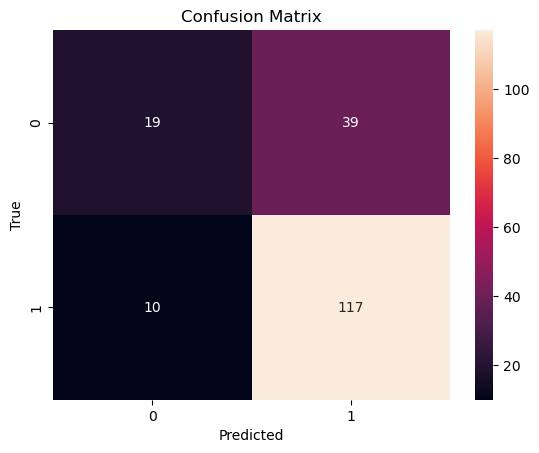

In [52]:
# Confusion matrix and classification report
matrix = confusion_matrix(y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, prediction_knn))

### Getting Graphical Representation By Implementing ROC_AUC curve 

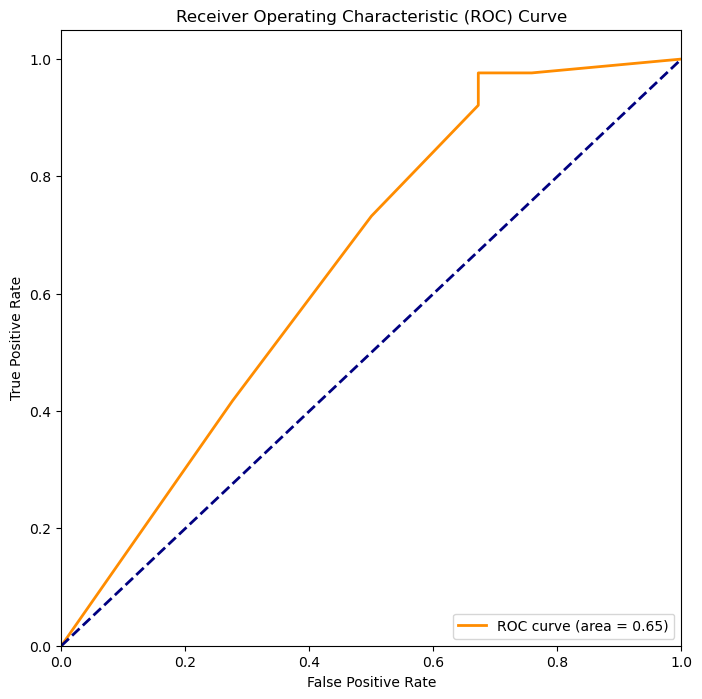

In [53]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Testing the knn model by giving inputs manually 

In [54]:
# Testing model by giving inputs manually
input_data = (5,16,72,19,75,25.8,0.87,51,70,90,122)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not eligable for loan')
else:
  print('The person is eligable for loan')

[[ 10.89089561  32.14480938  71.1904882   45.27127683 214.34115972
   -0.92277482  -0.57708108  -1.10044487  -4.45000067 247.09963026
  146.91115372]]
[1]
The person is eligable for loan


C:\Users\COMPUTER WORLD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
